In [1]:
!pip install -U spacy

In [2]:
pip install typing_extensions --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
import string


[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [4]:
elon_musk=pd.read_csv("Elon_musk.csv",encoding='mac_roman')
pd.set_option("display.max_row",None)
elon_musk

Unnamed: 0                                               Text
0              1                             @kunalb11 Iím an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
5              6  Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6              7  Frodo was the underdoge,\nAll thought he would...
7              8     @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8              9  @flcnhvy @anonyx10 Indeed! Tweets definitely d...
9             10   The most entertaining outcome is the most likely
10            11                       @GiveDirectly Just sent some
11            12         Just agree to do Clubhouse with @kanyewest
12            13                            https://t.co/3rWE9uHSTS
13            14     @geoffkeighley @UnrealEngine Itís getting real
14            15  Bought some Dogecoin for lil X, so he can be a...
15            16  @JoshManMode He definitely has issues, but the...
16            17                   @freewalletorg Thanks for fixing
17            18            @freewalletorg Please unlock my account
18            19               @AstroJordy <U+0001F923><U+0001F923>
19            20    This is true power haha https://t.co/Fc9uhQSd7O
20            21  @freewalletorg Any crypto wallet that wonít gi...
21            22                      @freewalletorg Your app sucks
22            23  RT @SpaceX: NASA has selected Falcon Heavy to ...
23            24                                   @ajtourville Yes
24            25  @BLKMDL3 @RationalEtienne @Adamklotz_ Once we ...
25            26  @RationalEtienne @Adamklotz_ Starlink is a sta...
26            27  @RationalEtienne @Adamklotz_ SpaceX needs to p...
27            28  @ID_AA_Carmack Lowest cost per ton of carbon s...
28            29  @Adamklotz_ Itís meant to be the same price in...
29            30  @tobyliiiiiiiiii This is intended for Earth, b...
30            31  @CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer ...
31            32  XPrize team will manage the $100M carbon captu...
32            33  @SRuhle Everyone at Tesla receives stock. \n\n...
33            34                                Back to work I go Ö
34            35  @CapybaraSurfer @MattWallace888 Does seem a bi...
35            36  @itsALLrisky Doge appears to be inflationary, ...
36            37                    @MichaelGalanin @kevinmgill Wow
37            38  @Erdayastronaut @michaelhodapp_ 1. Orbital lau...
38            39              @michaelhodapp_ Back to work tonight!
39            40  – is for –ogecoin! Instructional video.\nhttps...
40            41   The people have spoken Ö https://t.co/x41oVMzTGo
41            42     @Nivetha_7_42 @lexfridman So cute <U+0001F495>
42            43  @UniverCurious Extremely misleading image, as ...
43            44     <U+0001F3B6> Who let the Doge out <U+0001F3B6>
44            45                             Hodl the rainforests!!
45            46  So Ö itís finally come to this Ö https://t.co/...
46            47             @itsALLrisky Itís the most fun crypto!
47            48  @JoshRoomsburg @SnoopDogg @genesimmons Its sim...
48            49                          @astro_g_dogg @SpaceX Yup
49            50  @Jbuttermost @Dogecoinrich <U+0001F923><U+0001...
50            51                                @wapodavenport True
51            52             @Dogecoinrich <U+0001F923><U+0001F923>
52            53  @flcnhvy @AstroJordy Not that easy. This is tw...
53            54                                    @AstroJordy Yes
54            55                                    Lessons learned
55            56                                  Of Earth and Mars
56            57       Time to tell the story of Tesla &amp; SpaceX
57            58  @TheOnion Have you read @TheBabylonBee? Itís

### Data Preprocessing

In [5]:
elon_musk.Text=elon_musk.Text.apply(lambda x:re.sub('[^a-zA-Z  ]',"",x))

In [6]:
elon_musk.head()

Unnamed: 0                                               Text
0           1                                 kunalb Im an alien
1           2  IDAACarmack Ray tracing on Cyberpunk with HDR ...
2           3                   joerogan Spotify Great interview
3           4                       gtera Doge is underestimated
4           5  teslacn Congratulations Tesla China for amazin...

##Lower casting

In [7]:
elon_musk.Text=elon_musk.Text.apply(lambda x: x.lower())

In [8]:
elon_musk.head(10)

Unnamed: 0                                               Text
0           1                                 kunalb im an alien
1           2  idaacarmack ray tracing on cyberpunk with hdr ...
2           3                   joerogan spotify great interview
3           4                       gtera doge is underestimated
4           5  teslacn congratulations tesla china for amazin...
5           6          happy new year of the ox httpstcowfkmyuoj
6           7  frodo was the underdogeall thought he would fa...
7           8             owensparks flcnhvy anonyx haha thanks 
8           9  flcnhvy anonyx indeed tweets definitely do not...
9          10   the most entertaining outcome is the most likely

##Tokenization

In [9]:
elon_musk.Text=elon_musk.Text.apply(lambda x: x.split())

In [10]:
elon_musk

Unnamed: 0                                               Text
0              1                            [kunalb, im, an, alien]
1              2  [idaacarmack, ray, tracing, on, cyberpunk, wit...
2              3              [joerogan, spotify, great, interview]
3              4                  [gtera, doge, is, underestimated]
4              5  [teslacn, congratulations, tesla, china, for, ...
5              6  [happy, new, year, of, the, ox, httpstcowfkmyuoj]
6              7  [frodo, was, the, underdogeall, thought, he, w...
7              8        [owensparks, flcnhvy, anonyx, haha, thanks]
8              9  [flcnhvy, anonyx, indeed, tweets, definitely, ...
9             10  [the, most, entertaining, outcome, is, the, mo...
10            11                   [givedirectly, just, sent, some]
11            12  [just, agree, to, do, clubhouse, with, kanyewest]
12            13                                 [httpstcorweuhsts]
13            14  [geoffkeighley, unrealengine, its, getting, real]
14            15  [bought, some, dogecoin, for, lil, x, so, he, ...
15            16  [joshmanmode, he, definitely, has, issues, but...
16            17               [freewalletorg, thanks, for, fixing]
17            18       [freewalletorg, please, unlock, my, account]
18            19                                 [astrojordy, ufuf]
19            20    [this, is, true, power, haha, httpstcofcuhqsdo]
20            21  [freewalletorg, any, crypto, wallet, that, won...
21            22                  [freewalletorg, your, app, sucks]
22            23  [rt, spacex, nasa, has, selected, falcon, heav...
23            24                                 [ajtourville, yes]
24            25  [blkmdl, rationaletienne, adamklotz, once, we,...
25            26  [rationaletienne, adamklotz, starlink, is, a, ...
26            27  [rationaletienne, adamklotz, spacex, needs, to...
27            28  [idaacarmack, lowest, cost, per, ton, of, carb...
28            29  [adamklotz, its, meant, to, be, the, same, pri...
29            30  [tobyliiiiiiiiii, this, is, intended, for, ear...
30            31  [cryptoshrikar, coindesk, tesla, danzpalmer, u...
31            32  [xprize, team, will, manage, the, m, carbon, c...
32            33  [sruhle, everyone, at, tesla, receives, stock,...
33            34                            [back, to, work, i, go]
34            35  [capybarasurfer, mattwallace, does, seem, a, b...
35            36  [itsallrisky, doge, appears, to, be, inflation...
36            37                  [michaelgalanin, kevinmgill, wow]
37            38  [erdayastronaut, michaelhodapp, orbital, launc...
38            39           [michaelhodapp, back, to, work, tonight]
39            40  [is, for, ogecoin, instructional, videohttpstc...
40            41      [the, people, have, spoken, httpstcoxovmztgo]
41            42                [nivetha, lexfridman, so, cute, uf]
42            43  [univercurious, extremely, misleading, image, ...
43            44               [ufb, who, let, the, doge, out, ufb]
44            45                           [hodl, the, rainforests]
45            46  [so, its, finally, come, to, this, httpstcogfr...
46            47         [itsallrisky, its, the, most, fun, crypto]
47            48  [joshroomsburg, snoopdogg, genesimmons, its, s...
48            49                          [astrogdogg, spacex, yup]
49            50                  [jbuttermost, dogecoinrich, ufuf]
50            51                              [wapodavenport, true]
51            52                               [dogecoinrich, ufuf]
52            53  [flcnhvy, astrojordy, not, that, easy, this, i...
53            54                                  [astrojordy, yes]
54            55                                 [lessons, learned]
55            56                             [of, earth, and, mars]
56            57  [time, to, tell, the, story, of, tesla, amp, s...
57            58  [theonion, have, you, read, thebabylonbee, i

#Stop words removal

In [11]:
elon_musk.Text=elon_musk.Text.apply(lambda x:[word for word in x if word not in set(stopwords.words('english'))])

In [12]:
elon_musk

Unnamed: 0                                               Text
0              1                                [kunalb, im, alien]
1              2  [idaacarmack, ray, tracing, cyberpunk, hdr, ne...
2              3              [joerogan, spotify, great, interview]
3              4                      [gtera, doge, underestimated]
4              5  [teslacn, congratulations, tesla, china, amazi...
5              6           [happy, new, year, ox, httpstcowfkmyuoj]
6              7  [frodo, underdogeall, thought, would, failhims...
7              8        [owensparks, flcnhvy, anonyx, haha, thanks]
8              9  [flcnhvy, anonyx, indeed, tweets, definitely, ...
9             10                    [entertaining, outcome, likely]
10            11                               [givedirectly, sent]
11            12                      [agree, clubhouse, kanyewest]
12            13                                 [httpstcorweuhsts]
13            14       [geoffkeighley, unrealengine, getting, real]
14            15        [bought, dogecoin, lil, x, toddler, hodler]
15            16  [joshmanmode, definitely, issues, sentencing, ...
16            17                    [freewalletorg, thanks, fixing]
17            18           [freewalletorg, please, unlock, account]
18            19                                 [astrojordy, ufuf]
19            20              [true, power, haha, httpstcofcuhqsdo]
20            21  [freewalletorg, crypto, wallet, wont, give, pr...
21            22                        [freewalletorg, app, sucks]
22            23  [rt, spacex, nasa, selected, falcon, heavy, la...
23            24                                 [ajtourville, yes]
24            25  [blkmdl, rationaletienne, adamklotz, predict, ...
25            26  [rationaletienne, adamklotz, starlink, stagger...
26            27  [rationaletienne, adamklotz, spacex, needs, pa...
27            28  [idaacarmack, lowest, cost, per, ton, carbon, ...
28            29  [adamklotz, meant, price, countries, differenc...
29            30  [tobyliiiiiiiiii, intended, earth, may, ideas,...
30            31  [cryptoshrikar, coindesk, tesla, danzpalmer, u...
31            32  [xprize, team, manage, carbon, capture, prize,...
32            33  [sruhle, everyone, tesla, receives, stock, com...
33            34                                   [back, work, go]
34            35     [capybarasurfer, mattwallace, seem, bit, high]
35            36  [itsallrisky, doge, appears, inflationary, mea...
36            37                  [michaelgalanin, kevinmgill, wow]
37            38  [erdayastronaut, michaelhodapp, orbital, launc...
38            39               [michaelhodapp, back, work, tonight]
39            40  [ogecoin, instructional, videohttpstcoueeocofctb]
40            41                 [people, spoken, httpstcoxovmztgo]
41            42                    [nivetha, lexfridman, cute, uf]
42            43  [univercurious, extremely, misleading, image, ...
43            44                              [ufb, let, doge, ufb]
44            45                                [hodl, rainforests]
45            46                  [finally, come, httpstcogfrgqoaf]
46            47                         [itsallrisky, fun, crypto]
47            48  [joshroomsburg, snoopdogg, genesimmons, simpli...
48            49                          [astrogdogg, spacex, yup]
49            50                  [jbuttermost, dogecoinrich, ufuf]
50            51                              [wapodavenport, true]
51            52                               [dogecoinrich, ufuf]
52            53  [flcnhvy, astrojordy, easy, two, decades, inte...
53            54                                  [astrojordy, yes]
54            55                                 [lessons, learned]
55            56                                      [earth, mars]
56            57            [time, tell, story, tesla, amp, spacex]
57            58             [theonion, read, thebabylonbee, g

#### Stemming

In [13]:
ps=PorterStemmer()

In [14]:
elon_musk.Text=elon_musk.Text.apply(lambda x: [ps.stem(word)for word in x])

In [15]:
elon_musk.head()

Unnamed: 0                                               Text
0           1                                [kunalb, im, alien]
1           2  [idaacarmack, ray, trace, cyberpunk, hdr, next...
2           3              [joerogan, spotifi, great, interview]
3           4                          [gtera, doge, underestim]
4           5  [teslacn, congratul, tesla, china, amaz, execu...

Joining

In [16]:
elon_musk.Text=elon_musk.Text.apply(lambda x: " ".join(x))

In [17]:
elon_musk.head()

Unnamed: 0                                               Text
0           1                                    kunalb im alien
1           2  idaacarmack ray trace cyberpunk hdr nextlevel tri
2           3                   joerogan spotifi great interview
3           4                              gtera doge underestim
4           5  teslacn congratul tesla china amaz execut last...

### CountVectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
x=cv.fit_transform(elon_musk.Text.values).toarray()
x=pd.DataFrame(x,columns=cv.get_feature_names_out())
pd.set_option('Display.max_columns',None)
x.head(10)

aber  abl  abo  aboard  abort  absenc  absolut  absorb  absorpt  absurd  \
0     0    0    0       0      0       0        0       0        0       0   
1     0    0    0       0      0       0        0       0        0       0   
2     0    0    0       0      0       0        0       0        0       0   
3     0    0    0       0      0       0        0       0        0       0   
4     0    0    0       0      0       0        0       0        0       0   
5     0    0    0       0      0       0        0       0        0       0   
6     0    0    0       0      0       0        0       0        0       0   
7     0    0    0       0      0       0        0       0        0       0   
8     0    0    0       0      0       0        0       0        0       0   
9     0    0    0       0      0       0        0       0        0       0   

   absurdli  ac  academia  accel  acceler  accelera  accept  access  accid  \
0         0   0         0      0        0         0       0       0      0   
1         0   0         0      0        0         0       0       0      0   
2         0   0         0      0        0         0       0       0      0   
3         0   0         0      0        0         0       0       0      0   
4         0   0         0      0        0         0       0       0      0   
5         0   0         0      0        0         0       0       0      0   
6         0   0         0      0        0         0       0       0      0   
7         0   0         0      0        0         0       0       0      0   
8         0   0         0      0        0         0       0       0      0   
9         0   0         0      0        0         0       0       0      0   

   accident  accommod  account  accur  accura  accuraci  ace  achi  achiev  \
0         0         0        0      0       0         0    0     0       0   
1         0         0        0      0       0         0    0     0       0   
2         0         0        0      0       0         0    0     0       0   
3         0         0        0      0       0         0    0     0       0   
4         0         0        0      0       0         0    0     0       0   
5         0         0        0      0       0         0    0     0       0   
6         0         0        0      0       0         0    0     0       0   
7         0         0        0      0       0         0    0     0       0   
8         0         0        0      0       0         0    0     0       0   
9         0         0        0      0       0         0    0     0       0   

   acquisit  across  action  activ  actual  actuari  ad  adagio  adamblitz  \
0         0       0       0      0       0        0   0       0          0   
1         0       0       0      0       0        0   0       0          0   
2         0       0       0      0       0        0   0       0          0   
3         0       0       0      0       0        0   0       0          0   
4         0       0       0      0       0        0   0       0          0   
5         0       0       0      0       0        0   0       0          0   
6         0       0       0      0       0        0   0       0          0   
7         0       0       0      0       0        0   0       0          0   
8         0       0       0      0       0        0   0       0          0   
9         0       0       0      0       0        0   0       0          0   

   adamhoov  adamkiotz  adamklotz  add  addit  address  adlanbogatyryov  \
0         0          0          0    0      0        0                0   
1         0          0          0    0      0        0                0   
2         0          0          0    0      0        0                0   
3         0          0          0    0      0        0                0   
4         0          0          0    0      0        0                0   
5         0          0          0    0      0        0                0   
6         0          0          0    0    

In [19]:
x.shape

(1999, 4508)

In [20]:
#!pip install wordcloud
from wordcloud import WordCloud

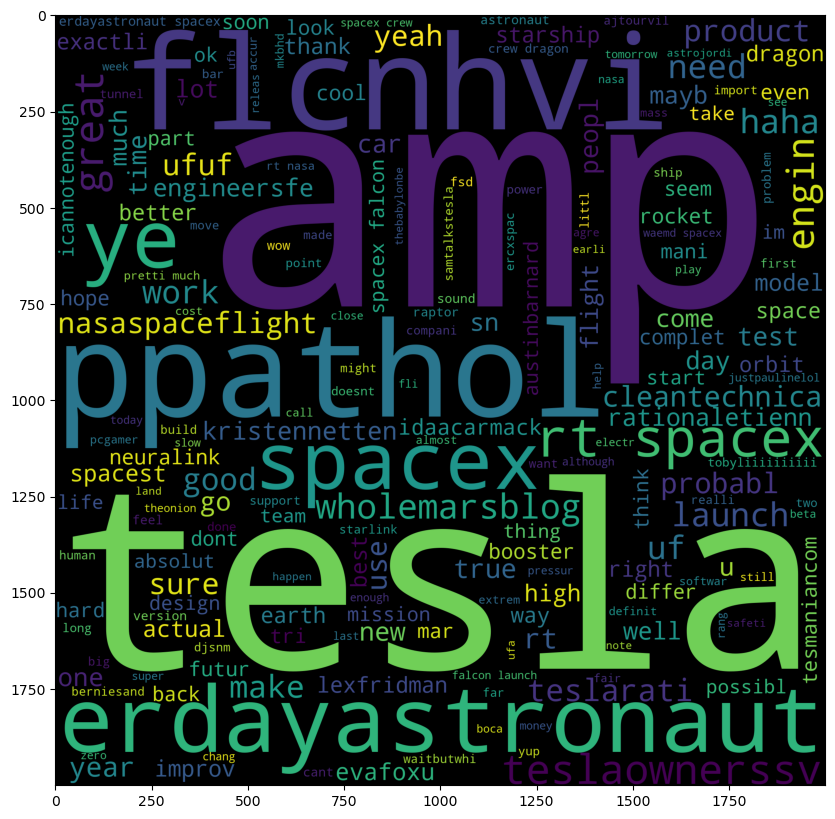

In [21]:
wordcloud_test=' '.join(elon_musk['Text'])
q_wordcloud=WordCloud(background_color='black',width=2000,height=2000).generate(wordcloud_test)
q_wordcloud
plt.figure(figsize=(10,10))
plt.imshow(q_wordcloud)
plt.show()

In [22]:
freq=pd.Series(' '.join(elon_musk['Text']).split()).value_counts()[0:20]
freq

spacex             249
amp                218
tesla              170
erdayastronaut     142
rt                 127
ppathol            123
flcnhvi            114
ye                  87
great               76
teslaownerssv       73
wholemarsblog       68
launch              63
teslarati           59
engin               58
nasaspaceflight     55
haha                55
need                52
good                52
like                51
make                51
dtype: int64

### Polarity For Sentiment Analysis

In [23]:
#!pip install textblob

In [24]:
from textblob import TextBlob
elon_musk['polarity']=elon_musk['Text'].apply(lambda x: TextBlob(x).sentiment[0])

In [25]:
elon_musk

Unnamed: 0                                               Text  \
0              1                                    kunalb im alien   
1              2  idaacarmack ray trace cyberpunk hdr nextlevel tri   
2              3                   joerogan spotifi great interview   
3              4                              gtera doge underestim   
4              5  teslacn congratul tesla china amaz execut last...   
5              6                 happi new year ox httpstcowfkmyuoj   
6              7  frodo underdogeal thought would failhimself ht...   
7              8                owenspark flcnhvi anonyx haha thank   
8              9  flcnhvi anonyx inde tweet definit repres realw...   
9             10                              entertain outcom like   
10            11                                  givedirectli sent   
11            12                            agre clubhous kanyewest   
12            13                                    httpstcorweuhst   
13            14                 geoffkeighley unrealengin get real   
14            15               bought dogecoin lil x toddler hodler   
15            16      joshmanmod definit issu sentenc seem bit high   
16            17                            freewalletorg thank fix   
17            18                 freewalletorg pleas unlock account   
18            19                                    astrojordi ufuf   
19            20                   true power haha httpstcofcuhqsdo   
20            21  freewalletorg crypto wallet wont give privat k...   
21            22                             freewalletorg app suck   
22            23  rt spacex nasa select falcon heavi launch firs...   
23            24                                       ajtourvil ye   
24            25  blkmdl rationaletienn adamklotz predict cash f...   
25            26  rationaletienn adamklotz starlink staggeringli...   
26            27  rationaletienn adamklotz spacex need pass deep...   
27            28  idaacarmack lowest cost per ton carbon sequest...   
28            29  adamklotz meant price countri differ tax amp ship   
29            30    tobyliiiiiiiiii intend earth may idea appli mar   
30            31         cryptoshrikar coindesk tesla danzpalm ufuf   
31            32  xprize team manag carbon captur prize httpstco...   
32            33  sruhl everyon tesla receiv stock comp stockopt...   
33            34                                       back work go   
34            35              capybarasurf mattwallac seem bit high   
35            36  itsallriski doge appear inflationari meaning f...   
36            37                       michaelgalanin kevinmgil wow   
37            38  erdayastronaut michaelhodapp orbit launch towe...   
38            39                    michaelhodapp back work tonight   
39            40           ogecoin instruct videohttpstcoueeocofctb   
40            41                      peopl spoken httpstcoxovmztgo   
41            42                         nivetha lexfridman cute uf   
42            43  univercuri extrem mislead imag doesnt reflect ...   
43            44                                   ufb let doge ufb   
44            45                                    hodl rainforest   
45            46                        final come httpstcogfrgqoaf   
46            47                             itsallriski fun crypto   
47            48   joshroomsburg snoopdogg genesimmon simplic geniu   
48            49                              astrogdogg spacex yup   
49            50                      jbuttermost dogecoinrich ufuf   
50            51                                 wapodavenport true   
51            52                                  dogecoinrich ufuf   
52            53  flcnhvi astrojordi easi two decad intens work ...   
53            54                                      astrojordi ye   
54            55                                       lesson learn   
55            56              

In [26]:
elon_musk.insert(column='emotions',value='',loc=3)

In [27]:
def sent(texts):
    if texts>0:
        return 'postive'
    elif texts==0:
        return 'nuetral'
    else: 
        return 'negative'
elon_musk['emotions']=elon_musk['polarity'].apply(sent)

In [28]:
elon_musk

Unnamed: 0                                               Text  \
0              1                                    kunalb im alien   
1              2  idaacarmack ray trace cyberpunk hdr nextlevel tri   
2              3                   joerogan spotifi great interview   
3              4                              gtera doge underestim   
4              5  teslacn congratul tesla china amaz execut last...   
5              6                 happi new year ox httpstcowfkmyuoj   
6              7  frodo underdogeal thought would failhimself ht...   
7              8                owenspark flcnhvi anonyx haha thank   
8              9  flcnhvi anonyx inde tweet definit repres realw...   
9             10                              entertain outcom like   
10            11                                  givedirectli sent   
11            12                            agre clubhous kanyewest   
12            13                                    httpstcorweuhst   
13            14                 geoffkeighley unrealengin get real   
14            15               bought dogecoin lil x toddler hodler   
15            16      joshmanmod definit issu sentenc seem bit high   
16            17                            freewalletorg thank fix   
17            18                 freewalletorg pleas unlock account   
18            19                                    astrojordi ufuf   
19            20                   true power haha httpstcofcuhqsdo   
20            21  freewalletorg crypto wallet wont give privat k...   
21            22                             freewalletorg app suck   
22            23  rt spacex nasa select falcon heavi launch firs...   
23            24                                       ajtourvil ye   
24            25  blkmdl rationaletienn adamklotz predict cash f...   
25            26  rationaletienn adamklotz starlink staggeringli...   
26            27  rationaletienn adamklotz spacex need pass deep...   
27            28  idaacarmack lowest cost per ton carbon sequest...   
28            29  adamklotz meant price countri differ tax amp ship   
29            30    tobyliiiiiiiiii intend earth may idea appli mar   
30            31         cryptoshrikar coindesk tesla danzpalm ufuf   
31            32  xprize team manag carbon captur prize httpstco...   
32            33  sruhl everyon tesla receiv stock comp stockopt...   
33            34                                       back work go   
34            35              capybarasurf mattwallac seem bit high   
35            36  itsallriski doge appear inflationari meaning f...   
36            37                       michaelgalanin kevinmgil wow   
37            38  erdayastronaut michaelhodapp orbit launch towe...   
38            39                    michaelhodapp back work tonight   
39            40           ogecoin instruct videohttpstcoueeocofctb   
40            41                      peopl spoken httpstcoxovmztgo   
41            42                         nivetha lexfridman cute uf   
42            43  univercuri extrem mislead imag doesnt reflect ...   
43            44                                   ufb let doge ufb   
44            45                                    hodl rainforest   
45            46                        final come httpstcogfrgqoaf   
46            47                             itsallriski fun crypto   
47            48   joshroomsburg snoopdogg genesimmon simplic geniu   
48            49                              astrogdogg spacex yup   
49            50                      jbuttermost dogecoinrich ufuf   
50            51                                 wapodavenport true   
51            52                                  dogecoinrich ufuf   
52            53  flcnhvi astrojordi easi two decad intens work ...   
53            54                                      astrojordi ye   
54            55                                       lesson learn   
55            56              

### visualization

<Axes: xlabel='emotions', ylabel='count'>

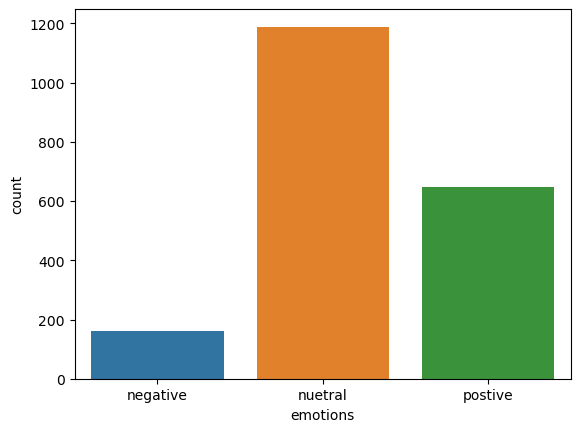

In [29]:
sns.countplot(x=elon_musk['emotions'])

<Axes: xlabel='polarity', ylabel='Density'>

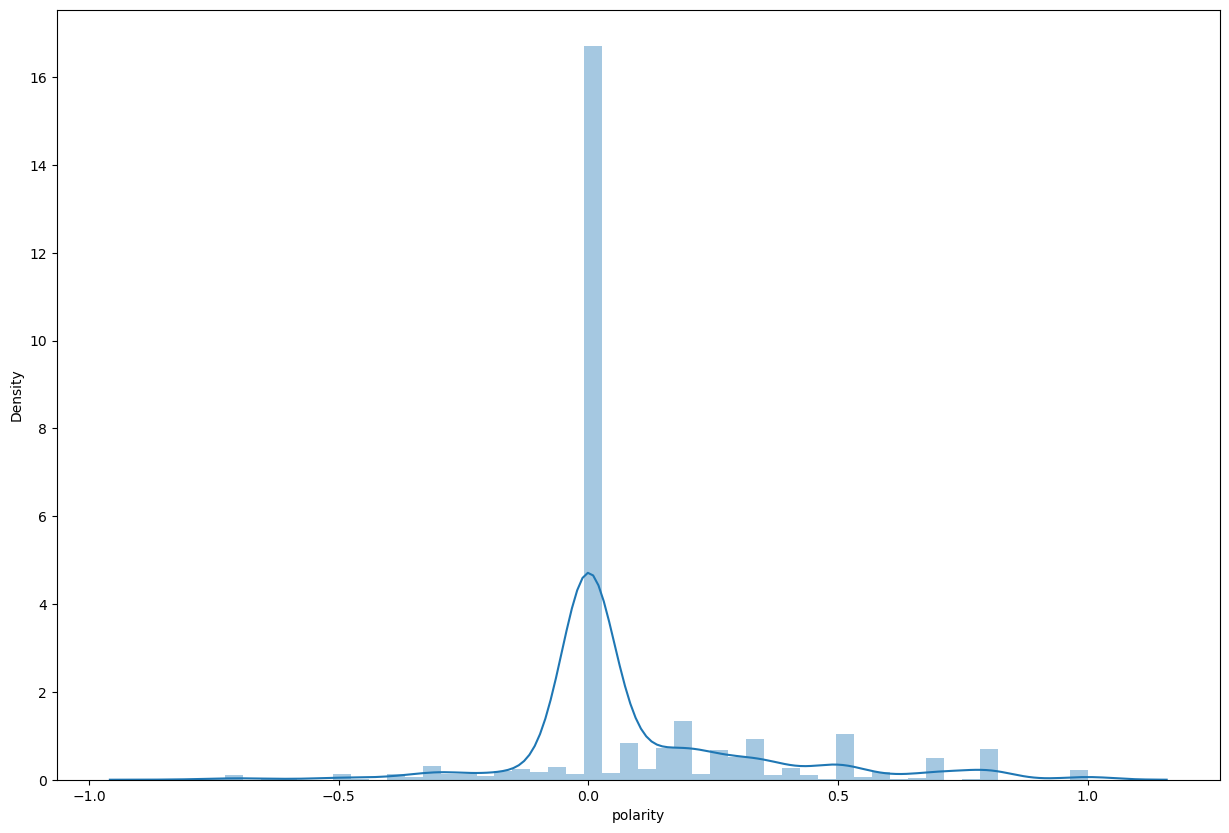

In [43]:
import warnings 
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,10))
sns.distplot(elon_musk['polarity'])

In [30]:
elon_musk.emotions.value_counts(normalize=True).mul(100)

nuetral     59.479740
postive     32.466233
negative     8.054027
Name: emotions, dtype: float64

### Around (60%) of tweet was nuetral while 1/3rd of tweets are positive (32.4%)and left out minor group showed negative(8%) emotion